In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

# data points in column vector [input, output]
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0,
             4.3, 4.4, 4.9]).reshape(-1, 1) # reshape(-1,1)은 Transpose와 같은 의미 
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0,
             3.5, 3.7, 3.9]).reshape(-1, 1) # reshape(-1,1)에서 -1은 가능한만큼임

# add outliers
# x = np.vstack([x, np.array([0.5, 3.8]).reshape(-1, 1)])
x = np.vstack([x, np.array([[0.5], [3.8]])]) # vstack 행에다 추가한거 
y = np.vstack([y, np.array([3.9, 0.3]).reshape(-1, 1)])

# m = y.shape[0]
A = np.hstack([x, x**0])
# A = np.hstack([x, np.ones([m,1])]) # skiny matrix 
A = np.asmatrix(A)

theta2 = cvx.Variable(2, 1)
obj2 = cvx.Minimize(cvx.norm(A*theta2-y, 2)) # cvx.norm(,2 norm)
cvx.Problem(obj2, []).solve()

theta1 = cvx.Variable(2, 1)
obj1 = cvx.Minimize(cvx.norm(A*theta1-y, 1)) # cvx.norm(,1 norm)
cvx.Problem(obj1, []).solve()

print('theta2:\n', theta2.value)
print('theta1:\n', theta1.value)

theta2:
 [[0.41766509]
 [1.25042815]]
theta1:
 [[0.66666667]
 [0.63333333]]


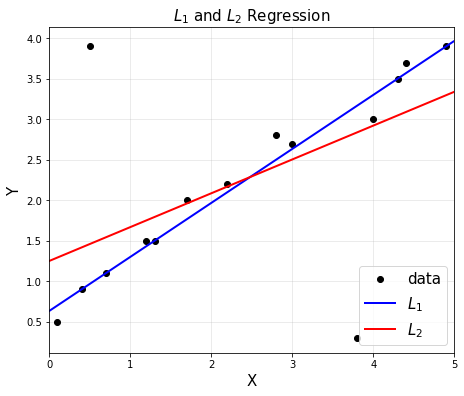

In [2]:
#to plot data -> point
plt.figure(figsize=(10,6))
plt.title('$L_1$ and $L_2$ Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x, y, 'ko', label='data')

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1,1)
yp1 = theta1.value[0,0]*xp + theta1.value[1,0]
yp2 = theta2.value[0,0]*xp + theta2.value[1,0]

plt.plot(xp, yp1, 'b', linewidth=2, label='$L_1$') #'b' blue
plt.plot(xp, yp2, 'r', linewidth=2, label='$L_2$') #'r' red
plt.legend(fontsize=15)
plt.axis('scaled')
plt.xlim([0, 5]) # x축 범위
plt.grid(alpha=0.3)
plt.show()